In [ ]:
!pip install -q catboost
!pip install -q lightgbm
!pip install -q xgboost
!pip install -q mlxtend
!pip install -q dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 13.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('train_contest.csv')
data

,premium,name,department,has_test,response_letter_required,area,type,address,response_url,sort_point_distance,...,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url,mean_salary
0,False,Агент по недвижимости,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Невский...",NaN,NaN,...,[],[],False,"<p>Мы ищем людей, которым не достаточно того, ...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Жилая недвижимость'}, {'name': 'Акт...","[{'id': '20.20', 'name': 'Агент', 'profarea_id...",Санкт-Петербург,NaN,125000.0
1,False,IT-специалист/ техник,NaN,False,False,"{'id': '1130', 'name': 'Братск', 'url': 'https...","{'id': 'open', 'name': 'Открытая'}",NaN,NaN,NaN,...,[],[],False,<ul> </ul> <p><em><strong>Навыки</strong></em>...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Иркутская область,NaN,50000.0
2,False,Старший/ведущий инженер-программист,NaN,False,False,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Ростов-на-Дону', 'street': '60К-9, 1...",NaN,NaN,...,[],[],False,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Ростовская область,NaN,80000.0
3,False,Эксперт / методист приемной комиссии,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': '1-я Миусская ули...",NaN,NaN,...,[],[],False,<p>Департамент информационных технологий РХТУ ...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С программирование'}, {'name': 'Об...","[{'id': '3.150', 'name': 'Менеджмент продукта ...",Москва,NaN,120000.0
4,False,Табельщица/табельщик,NaN,False,False,"{'id': '1613', 'name': 'Энгельс', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",NaN,NaN,...,[],[],False,<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Составление отчетности'}, {'name': ...","[{'id': '18.142', 'name': 'Машиностроение', 'p...",Саратовская область,NaN,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30067,False,Руководитель отдела персонала,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградский пр...",NaN,NaN,...,[],[],False,<strong>Обязанности:</strong> <ul> <li>Управле...,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","[{'name': 'Подбор персонала'}, {'name': 'Адапт...","[{'id': '9.738', 'name': 'Другое', 'profarea_i...",Москва,NaN,190000.0
30068,False,Специалист по развитию и обучению персонала,NaN,False,False,"{'id': '1641', 'name': 'Набережные Челны', 'ur...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Набережные Челны', 'street': 'проспе...",NaN,NaN,...,[],[],False,<p>Группа компаний &quot;Бринэкс&quot; приглаш...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Управление временем'}, {'name': 'Ор...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Татарстан,NaN,45000.0
30069,False,Инженер-программист,NaN,False,False,"{'id': '1399', 'name': 'Магнитогорск', 'url': ...","{'id': 'open', 'name': 'Открытая'}",NaN,NaN,NaN,...,[],[],False,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'SQL'}, {'name': 'Работа с базами да...","[{'id': '1.221', 'name': 'Программирование, Ра...",Челябинская область,NaN,75000.0
30070,False,Куратор проекта,"{'id': '1947314-1947314-ancor', 'name': 'ANCOR'}",False,False,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...","{'id': 'open', 'name': 'Откр

In [ ]:
data.describe()

,response_url,sort_point_distance,immediate_redirect_url,mean_salary
count,0.0,0.0,0.0,3.007200e+04
mean,NaN,NaN,NaN,9.772825e+04
std,NaN,NaN,NaN,1.046010e+05
min,NaN,NaN,NaN,2.000000e+01
25%,NaN,NaN,NaN,4.250000e+04
50%,NaN,NaN,NaN,7.000000e+04
75%,NaN,NaN,NaN,1.200000e+05
max,NaN,NaN,NaN,2.750000e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   30072 non-null  bool   
 1   name                      30072 non-null  object 
 2   department                752 non-null    object 
 3   has_test                  30072 non-null  bool   
 4   response_letter_required  30072 non-null  bool   
 5   area                      30072 non-null  object 
 6   type                      30072 non-null  object 
 7   address                   19105 non-null  object 
 8   response_url              0 non-null      float64
 9   sort_point_distance       0 non-null      float64
 10  published_at              30072 non-null  object 
 11  created_at                30072 non-null  object 
 12  archived                  30072 non-null  bool   
 13  insider_interview         94 non-null     object 
 14  url   

In [ ]:
#data_cleared = data.drop(columns=['response_url', 'sort_point_distance', 'insider_interview', 'immediate_redirect_url', 'department'])
#data_cleared = data.drop(columns=['response_url', 'sort_point_distance', 'insider_interview', 'immediate_redirect_url', 'department', 'area', 'address', 'description', 'key_skills'])
data_cleared = data.drop(columns=['response_url', 'sort_point_distance', 'immediate_redirect_url', 'url', 'archived', 'created_at', 'working_days', 'accept_temporary', 'type'])#.drop(columns=['response_url', 'sort_point_distance', 'insider_interview', 'immediate_redirect_url', 'department', 'description', 'key_skills', 'url', 'area', 'alternate_url', 'published_at', 'created_at', 'address', 'snippet', 'relations', 'type', 'working_days', 'response_letter_required', 'archived', 'working_time_intervals'])

In [ ]:
X, y = data_cleared.drop(columns=['mean_salary']).fillna('NaN'), data_cleared['mean_salary']
y

,mean_salary
0,125000.0
1,50000.0
2,80000.0
3,120000.0
4,15000.0
...,...
30067,190000.0
30068,45000.0
30069,75000.0
30070,30000.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
categorical_features = data_cleared.drop(columns=['mean_salary']).columns.tolist()
categorical_features

['premium',
 'name',
 'department',
 'has_test',
 'response_letter_required',
 'area',
 'address',
 'published_at',
 'insider_interview',
 'alternate_url',
 'relations',
 'employer',
 'snippet',
 'contacts',
 'schedule',
 'working_time_intervals',
 'working_time_modes',
 'description',
 'experience',
 'key_skills',
 'specializations',
 'region']

In [ ]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor(iterations=1500).fit(X, y, cat_features = categorical_features)

Learning rate set to 0.050416
0:	learn: 102791.7911062	total: 149ms	remaining: 3m 43s
1:	learn: 101092.7631696	total: 274ms	remaining: 3m 25s
2:	learn: 99544.1736572	total: 417ms	remaining: 3m 28s
3:	learn: 98077.1575724	total: 539ms	remaining: 3m 21s
4:	learn: 96710.4687310	total: 629ms	remaining: 3m 8s
5:	learn: 95402.1479953	total: 759ms	remaining: 3m 8s
6:	learn: 94216.7520047	total: 862ms	remaining: 3m 3s
7:	learn: 93132.3021417	total: 982ms	remaining: 3m 3s
8:	learn: 92027.6155583	total: 1.11s	remaining: 3m 4s
9:	learn: 91053.2269231	total: 1.22s	remaining: 3m 1s
10:	learn: 90113.6031621	total: 1.37s	remaining: 3m 5s
11:	learn: 89168.4047316	total: 1.48s	remaining: 3m 4s
12:	learn: 88412.0703775	total: 1.59s	remaining: 3m 1s
13:	learn: 87584.6927386	total: 1.7s	remaining: 3m
14:	learn: 86834.9982906	total: 1.82s	remaining: 2m 59s
15:	learn: 86213.6142300	total: 1.94s	remaining: 3m
16:	learn: 85660.7296881	total: 2.06s	remaining: 2m 59s
17:	learn: 85126.5009756	total: 2.2s	remaini

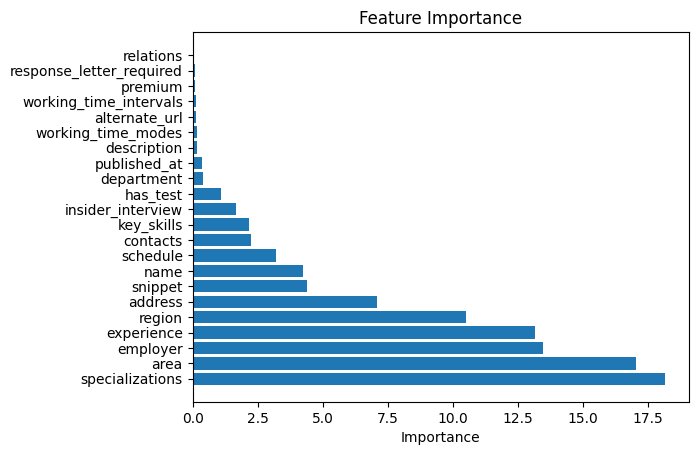

In [ ]:
feature_importances = clf.get_feature_importance()

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

pr = clf.predict(X_test)
mean_absolute_error(y_test, pr)

28883.44208221542

### PREDICTION

In [ ]:
data_prediction = pd.read_csv('for_prediction.csv')
data_prediction

,Id,premium,name,department,has_test,response_letter_required,area,type,address,response_url,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,False,Помощник маркетолога,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",NaN,NaN,...,[],[],[],False,<p>В IT-компанию Ищем Интернет-маркетолога (уд...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Контекстная реклама'}, {'name': 'Ин...","[{'id': '3.206', 'name': 'Печатная реклама', '...",Москва,NaN
1,1,False,Менеджер по персоналу,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Новочер...",NaN,...,[],[],[],False,<p>Мы приглашаем на работу соискателей на долж...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Санкт-Петербург,NaN
2,2,False,"Инструктор на детскую игровую площадку (ТЦ ""Ме...",NaN,False,False,"{'id': '99', 'name': 'Уфа', 'url': 'https://ap...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Уфа', 'street': 'Рубежная улица', 'b...",NaN,...,[],[],[],False,"<strong>Если ты любишь играть, прыгать и бегат...","{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '24.378', 'name': 'Тренерский состав',...",Республика Башкортостан,NaN
3,3,False,Программист Delphi,NaN,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'id': 'open', 'name': 'Открытая'}",NaN,NaN,...,[],[],[],False,<p>Компания AMS Software - разработчик популяр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Delphi'}, {'name': 'Разработка ПО'}...","[{'id': '1.221', 'name': 'Программирование, Ра...",Новосибирская область,NaN
4,4,False,Ведущий специалист ВКС,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Чистопрудный бул...",NaN,...,[],[],[],False,<p><strong>Компания &quot;ТехноКад&quot; - оди...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Настройка ПК'}, {'name': 'Техническ...","[{'id': '1.172', 'name': 'Начальный уровень, М...",Москва,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,7513,False,HR менеджер,NaN,False,False,"{'id': '131', 'name': 'Симферополь', 'url': 'h...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Симферополь', 'street': 'улица Жени ...",NaN,...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Поиск и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Крым,NaN
7514,7514,False,Руководитель HR отдела,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Электрический пе...",NaN,...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Организ...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Ведение отчетности'}, {'name': 'Вед...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Москва,NaN
7515,7515,False,Системный аналитик (Стажер),"{'id': '80-80-bank', 'name': ' Альфа-Банк'}",False,False,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Екатеринбург', 'street': 'Горького',...",NaN,...,[],[],[],False,<p>Альфа-Банк — крупнейший частный банк России...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Разработка технических заданий'}, {...","[{'id': '17.751', 'name': 'Другое', 'profarea_...",Свердловская область,NaN
7516,7516,False,Руководитель Отдела развития банковских технол...,NaN,False,False,"{'id': '22', 'name': 'Владивосток', 'url': 'ht...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Владивосток', 'street': 'Партизански...",NaN,...,[],[],[],False

In [ ]:
#data_prediction_cleared = data.drop(columns=['response_url', 'sort_point_distance', 'insider_interview', 'immediate_redirect_url', 'department'])
data_prediction_cleared = data_prediction.drop(columns=['response_url', 'sort_point_distance', 'immediate_redirect_url', 'url', 'archived', 'created_at', 'working_days', 'accept_temporary', 'type'])#.drop(columns=['response_url', 'sort_point_distance', 'insider_interview', 'immediate_redirect_url', 'department', 'description', 'key_skills', 'url', 'area', 'alternate_url', 'published_at', 'created_at', 'address', 'snippet', 'relations', 'type', 'working_days', 'response_letter_required', 'working_time_intervals', 'working_time_modes'])
data_prediction_cleared

,Id,premium,name,department,has_test,response_letter_required,area,address,published_at,insider_interview,...,snippet,contacts,schedule,working_time_intervals,working_time_modes,description,experience,key_skills,specializations,region
0,0,False,Помощник маркетолога,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,2022-04-30T00:02:25+0300,NaN,...,"{'requirement': None, 'responsibility': 'Разра...",NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],<p>В IT-компанию Ищем Интернет-маркетолога (уд...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Контекстная реклама'}, {'name': 'Ин...","[{'id': '3.206', 'name': 'Печатная реклама', '...",Москва
1,1,False,Менеджер по персоналу,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'city': 'Санкт-Петербург', 'street': 'Новочер...",2022-05-18T12:58:27+0300,NaN,...,"{'requirement': 'Высшее образование.', 'respon...","{'name': 'Корсунь Татьяна Дмитриевна', 'email'...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<p>Мы приглашаем на работу соискателей на долж...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Санкт-Петербург
2,2,False,"Инструктор на детскую игровую площадку (ТЦ ""Ме...",NaN,False,False,"{'id': '99', 'name': 'Уфа', 'url': 'https://ap...","{'city': 'Уфа', 'street': 'Рубежная улица', 'b...",2022-05-06T16:07:14+0300,NaN,...,{'requirement': 'Бесконечная любовь к детям. Т...,"{'name': 'Эльвира', 'email': 'rabota@mega02.ru...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],"<strong>Если ты любишь играть, прыгать и бегат...","{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '24.378', 'name': 'Тренерский состав',...",Республика Башкортостан
3,3,False,Программист Delphi,NaN,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",NaN,2022-05-24T10:25:45+0300,NaN,...,{'requirement': 'Хорошее знание и опыт работы ...,"{'name': 'Денисенко Лейла', 'email': 'hr@ams-s...","{'id': 'remote', 'name': 'Удаленная работа'}",[],[],<p>Компания AMS Software - разработчик популяр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Delphi'}, {'name': 'Разработка ПО'}...","[{'id': '1.221', 'name': 'Программирование, Ра...",Новосибирская область
4,4,False,Ведущий специалист ВКС,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'city': 'Москва', 'street': 'Чистопрудный бул...",2022-05-18T09:56:41+0300,NaN,...,{'requirement': 'Высшее техническое образовани...,"{'name': 'Зазирная Виктория', 'email': 'zva@te...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<p><strong>Компания &quot;ТехноКад&quot; - оди...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Настройка ПК'}, {'name': 'Техническ...","[{'id': '1.172', 'name': 'Начальный уровень, М...",Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,7513,False,HR менеджер,NaN,False,False,"{'id': '131', 'name': 'Симферополь', 'url': 'h...","{'city': 'Симферополь', 'street': 'улица Жени ...",2022-05-19T10:39:51+0300,NaN,...,{'requirement': 'Желание работать. Стрессоусто...,"{'name': 'Григорьева Надежда', 'email': 'pom.r...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<strong>Обязанности:</strong> <ul> <li>Поиск и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Крым
7514,7514,False,Руководитель HR отдела,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'city': 'Москва', 'street': 'Электрический пе...",2022-05-04T20:15:16+0300,NaN,...,"{'requirement': None, 'responsibility': 'Орган...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],<strong>Обязанности:</strong> <ul> <li>Организ...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Ведение отчетности'}, {'name': 'Вед...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar..."

In [ ]:
x_prediction = data_prediction_cleared.drop(columns=['Id']).fillna('NaN')
x_prediction

,premium,name,department,has_test,response_letter_required,area,address,published_at,insider_interview,alternate_url,...,snippet,contacts,schedule,working_time_intervals,working_time_modes,description,experience,key_skills,specializations,region
0,False,Помощник маркетолога,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,2022-04-30T00:02:25+0300,NaN,https://hh.ru/vacancy/55157893,...,"{'requirement': None, 'responsibility': 'Разра...",NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],<p>В IT-компанию Ищем Интернет-маркетолога (уд...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Контекстная реклама'}, {'name': 'Ин...","[{'id': '3.206', 'name': 'Печатная реклама', '...",Москва
1,False,Менеджер по персоналу,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'city': 'Санкт-Петербург', 'street': 'Новочер...",2022-05-18T12:58:27+0300,NaN,https://hh.ru/vacancy/55512119,...,"{'requirement': 'Высшее образование.', 'respon...","{'name': 'Корсунь Татьяна Дмитриевна', 'email'...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<p>Мы приглашаем на работу соискателей на долж...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Санкт-Петербург
2,False,"Инструктор на детскую игровую площадку (ТЦ ""Ме...",NaN,False,False,"{'id': '99', 'name': 'Уфа', 'url': 'https://ap...","{'city': 'Уфа', 'street': 'Рубежная улица', 'b...",2022-05-06T16:07:14+0300,NaN,https://hh.ru/vacancy/54985432,...,{'requirement': 'Бесконечная любовь к детям. Т...,"{'name': 'Эльвира', 'email': 'rabota@mega02.ru...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],"<strong>Если ты любишь играть, прыгать и бегат...","{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '24.378', 'name': 'Тренерский состав',...",Республика Башкортостан
3,False,Программист Delphi,NaN,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",NaN,2022-05-24T10:25:45+0300,NaN,https://hh.ru/vacancy/55886034,...,{'requirement': 'Хорошее знание и опыт работы ...,"{'name': 'Денисенко Лейла', 'email': 'hr@ams-s...","{'id': 'remote', 'name': 'Удаленная работа'}",[],[],<p>Компания AMS Software - разработчик популяр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Delphi'}, {'name': 'Разработка ПО'}...","[{'id': '1.221', 'name': 'Программирование, Ра...",Новосибирская область
4,False,Ведущий специалист ВКС,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'city': 'Москва', 'street': 'Чистопрудный бул...",2022-05-18T09:56:41+0300,NaN,https://hh.ru/vacancy/55499793,...,{'requirement': 'Высшее техническое образовани...,"{'name': 'Зазирная Виктория', 'email': 'zva@te...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<p><strong>Компания &quot;ТехноКад&quot; - оди...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Настройка ПК'}, {'name': 'Техническ...","[{'id': '1.172', 'name': 'Начальный уровень, М...",Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,False,HR менеджер,NaN,False,False,"{'id': '131', 'name': 'Симферополь', 'url': 'h...","{'city': 'Симферополь', 'street': 'улица Жени ...",2022-05-19T10:39:51+0300,NaN,https://hh.ru/vacancy/55243681,...,{'requirement': 'Желание работать. Стрессоусто...,"{'name': 'Григорьева Надежда', 'email': 'pom.r...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],<strong>Обязанности:</strong> <ul> <li>Поиск и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Подбор персонала'}, {'name': 'Работ...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Крым
7514,False,Руководитель HR отдела,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'city': 'Москва', 'street': 'Электрический пе...",2022-05-04T20:15:16+0300,NaN,https://hh.ru/vacancy/55204965,...,"{'requirement': None, 'responsibility': 'Орган...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],

In [ ]:
prediction_omg = clf.predict(x_prediction)
prediction_omg

array([ 50480.99147945,  42572.41680543,  34609.71953833, ...,
        56843.04090768,  98960.12193676, 161800.74636848])

In [ ]:
prediction_omg = pd.DataFrame(prediction_omg, columns=['predict'])
prediction_omg['Id'] = prediction_omg.index
prediction_omg

,predict,Id
0,50480.991479,0
1,42572.416805,1
2,34609.719538,2
3,173952.053614,3
4,75296.570036,4
...,...,...
7513,37481.252723,7513
7514,92266.953070,7514
7515,56843.040908,7515
7516,98960.121937,7516


In [ ]:
y_pred_df = prediction_omg[['Id', 'predict']]
y_pred_df

,Id,predict
0,0,50480.991479
1,1,42572.416805
2,2,34609.719538
3,3,173952.053614
4,4,75296.570036
...,...,...
7513,7513,37481.252723
7514,7514,92266.953070
7515,7515,56843.040908
7516,7516,98960.121937


In [ ]:
y_pred_df.to_csv(r'predictions.csv', index=False)